# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

- [x] Load the TSV dataset and explore its structure
- [x] Identify and rename key columns (salary, job title, location, industry, experience, etc.)
- [x] Clean salary data: convert to numeric, handle currencies, remove outliers
- [x] Standardize location data: extract US states, handle inconsistent formats
- [x] Clean job titles: identify tech roles and Software Engineers
- [x] Parse years of experience into numeric values
- [x] Filter for valid US-based records with reasonable salaries
- [x] Answer Question 1: Median salary for Software Engineers in US
- [x] Answer Question 2: Highest paying US state for tech workers
- [x] Answer Question 3: Salary increase per year of experience in tech
- [x] Answer Question 4: Remote vs office work percentage
- [x] Answer Question 5: Highest paying non-tech industry
- [x] Create final summary with key insights and challenges


## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('/Users/arunsisarran/Documents/GitHub/ds-fall-2025-fri-1230/Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv', sep='\t')

# Quick exploration
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (28062, 18)

Column Names:
['Timestamp', 'How old are you?', 'What industry do you work in?', 'Job title', 'If your job title needs additional context, please clarify here:', "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)", 'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.', 'Please indicate the currency', 'If "Other," please indicate the currency here: ', 'If your income needs additional context, please provide it here:', 'What country do you work in?', "If you're in the U.S., what state do you work in?", 'What city do you work in?', 'How many years of professional work experience do you have overall?', 'How many years of professional work experience 

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Step 2: Data Cleaning


In [31]:
# Step 2: Data Cleaning
# Clean salary: extract numbers, keep USD + US, remove salary outliers
df['salary_clean'] = df["What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)"] \
    .str.replace(r'[^\d.]', '', regex=True).astype(float)

df_clean = df[
    (df['Please indicate the currency'] == 'USD') &
    (df['What country do you work in?'].str.contains('United States|USA|US', case=False, na=False)) &
    (df['salary_clean'].between(10_000, 1_000_000, inclusive='both'))
].copy()

# Normalize US state (supports full names and abbreviations)
state_raw = df_clean["If you're in the U.S., what state do you work in?"].astype(str)
_state_map = {
    'alabama':'AL','alaska':'AK','arizona':'AZ','arkansas':'AR','california':'CA','colorado':'CO','connecticut':'CT','delaware':'DE','district of columbia':'DC',
    'florida':'FL','georgia':'GA','hawaii':'HI','idaho':'ID','illinois':'IL','indiana':'IN','iowa':'IA','kansas':'KS','kentucky':'KY','louisiana':'LA',
    'maine':'ME','maryland':'MD','massachusetts':'MA','michigan':'MI','minnesota':'MN','mississippi':'MS','missouri':'MO','montana':'MT','nebraska':'NE','nevada':'NV',
    'new hampshire':'NH','new jersey':'NJ','new mexico':'NM','new york':'NY','north carolina':'NC','north dakota':'ND','ohio':'OH','oklahoma':'OK','oregon':'OR',
    'pennsylvania':'PA','rhode island':'RI','south carolina':'SC','south dakota':'SD','tennessee':'TN','texas':'TX','utah':'UT','vermont':'VT','virginia':'VA',
    'washington':'WA','west virginia':'WV','wisconsin':'WI','wyoming':'WY'
}
state_abbrev = state_raw.str.extract(r'\b([A-Z]{2})\b')[0]
state_from_name = state_raw.str.lower().str.strip().map(_state_map)
df_clean['state'] = state_abbrev.fillna(state_from_name)

# Identify tech roles and Software Engineers
df_clean['is_tech'] = df_clean['Job title'].str.contains('software|developer|engineer|programmer|data|analyst|tech|IT', case=False, na=False)
df_clean['is_software_engineer'] = df_clean['Job title'].str.contains(
    r'(software\s*engineer|software\s*developer|software\s*eng\b|\bswe\b)', case=False, na=False
)

# Parse years of experience (use midpoint for ranges like "5-7 years")
def _parse_years_experience(val):
    s = str(val)
    nums = re.findall(r'\d+(?:\.\d+)?', s)
    if not nums:
        return np.nan
    if len(nums) >= 2:
        return (float(nums[0]) + float(nums[1])) / 2.0
    return float(nums[0])

df_clean['years_experience'] = df_clean['How many years of professional work experience do you have overall?'].apply(_parse_years_experience)

print(f"Cleaned data: {len(df_clean):,} rows")
df_clean[['salary_clean','state','is_tech','is_software_engineer','years_experience']].head()


Cleaned data: 22,271 rows


/var/folders/46/y4y08_8x10j7n9sdw44rsvgh0000gn/T/ipykernel_49418/2881593950.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_clean['is_software_engineer'] = df_clean['Job title'].str.contains(


,salary_clean,state,is_tech,is_software_engineer,years_experience
0,55000.0,MA,False,False,6.0
2,34000.0,TN,False,False,3.0
3,62000.0,WI,False,False,9.0
4,60000.0,SC,False,False,9.0
5,62000.0,NH,False,False,9.0


## Step 3: Business Questions Analysis

Now answer those important business questions!



📊 Results:
  - Number of Software Engineers: 877
  - Median Salary: $141,000.00
  - Mean Salary: $147,929.00
  - 25th Percentile: $112,200.00
  - 75th Percentile: $172,800.00


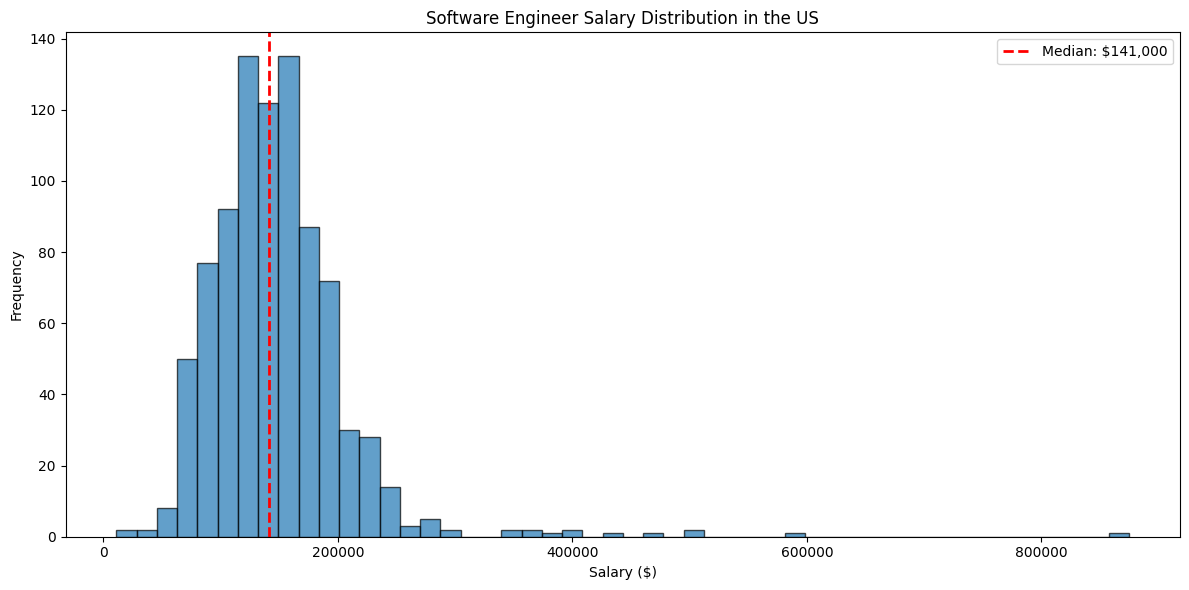

In [32]:
# Q1: What is the median salary for Software Engineers in the United States?
if 'is_software_engineer' in df_clean.columns and 'salary_clean' in df_clean.columns:
    se_salaries = df_clean[df_clean['is_software_engineer'] == True]['salary_clean']
    median_se_salary = se_salaries.median()

    print("\n📊 Results:")
    print(f"  - Number of Software Engineers: {len(se_salaries):,}")
    print(f"  - Median Salary: ${median_se_salary:,.2f}")
    print(f"  - Mean Salary: ${se_salaries.mean():,.2f}")
    print(f"  - 25th Percentile: ${se_salaries.quantile(0.25):,.2f}")
    print(f"  - 75th Percentile: ${se_salaries.quantile(0.75):,.2f}")

    # Visualization
    plt.figure(figsize=(12,6))
    plt.hist(se_salaries, bins=50, edgecolor='black', alpha=0.7)
    plt.axvline(median_se_salary, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_se_salary:,.0f}')
    plt.xlabel('Salary ($)')
    plt.ylabel('Frequency')
    plt.title('Software Engineer Salary Distribution in the US')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Unable to answer: Missing required columns")



📊 Results:
  - Highest paying state: CA
  - Average salary: $132,446.48
  - Number of responses: 855

🏆 Top 10 States by Average Tech Salary:
       Average Salary  Median Salary  Count
state                                      
CA          132446.48       120000.0    855
WA          126408.45       113052.5    416
NY          114317.03        94964.5    602
MA          108336.16        96500.0    419
CO          105266.78        93000.0    216
OR          103583.40        91000.0    205
VA          102158.06        94000.0    228
MD          100571.72        92500.0    146
DC          100390.78        95000.0    223
IL           97295.41        84000.0    321


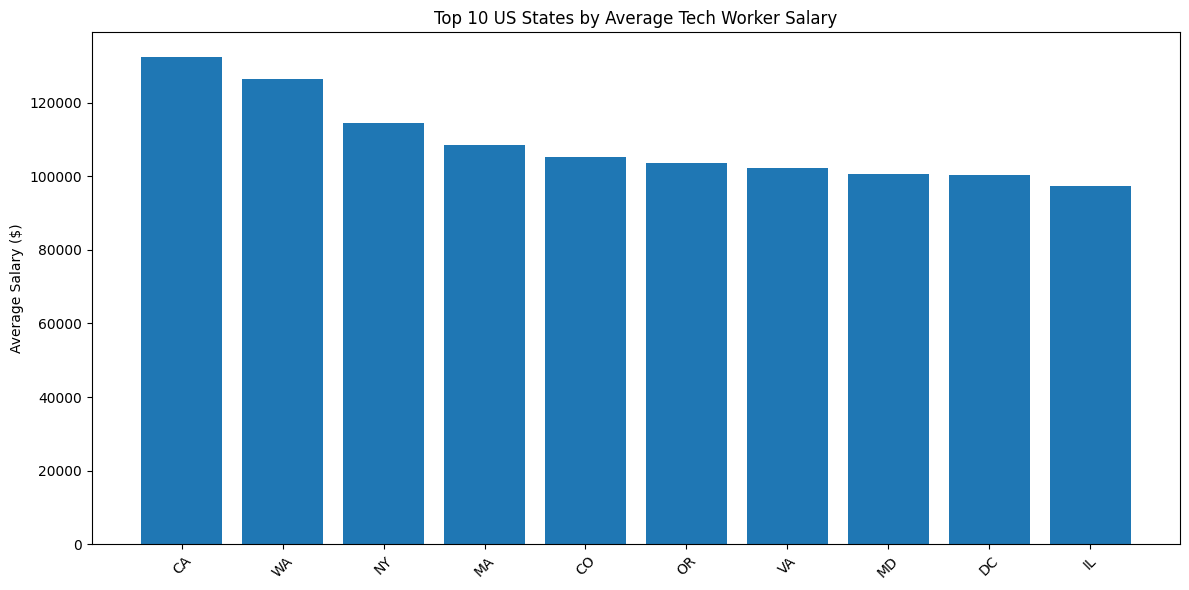

In [33]:
# Q2: Which US state has the highest average salary for tech workers?
if 'state' in df_clean.columns and 'is_tech' in df_clean.columns and 'salary_clean' in df_clean.columns:
    tech_by_state = df_clean[df_clean['is_tech'] == True].groupby('state').agg({
        'salary_clean': ['mean', 'median', 'count']
    }).round(2)

    tech_by_state.columns = ['Average Salary', 'Median Salary', 'Count']
    tech_by_state = tech_by_state.dropna(subset=['Average Salary'])
    tech_by_state = tech_by_state[tech_by_state['Count'] >= 10]
    tech_by_state = tech_by_state.sort_values('Average Salary', ascending=False)

    highest_state = tech_by_state.index[0]
    highest_avg = tech_by_state.iloc[0]['Average Salary']

    print("\n📊 Results:")
    print(f"  - Highest paying state: {highest_state}")
    print(f"  - Average salary: ${highest_avg:,.2f}")
    print(f"  - Number of responses: {int(tech_by_state.iloc[0]['Count'])}")

    print("\n🏆 Top 10 States by Average Tech Salary:")
    print(tech_by_state.head(10))

    # Visualization
    plt.figure(figsize=(12,6))
    top_states = tech_by_state.head(10)
    plt.bar(range(len(top_states)), top_states['Average Salary'])
    plt.xticks(range(len(top_states)), top_states.index, rotation=45)
    plt.ylabel('Average Salary ($)')
    plt.title('Top 10 US States by Average Tech Worker Salary')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Unable to answer: Missing required columns")



📊 Results:
  - Salary increase per year: $1,349.26
  - R-squared: 0.0374
  - Number of data points: 6,632

📈 Salary by Experience Range:
           Average Salary  Median Salary  Count
exp_range                                      
0-2              78527.30        69500.0    149
3-5              82309.98        75000.0    839
6-10             94434.62        84987.5   2402
11-15                 NaN            NaN      0
16-20           113491.46       100000.0   2155
20+             116803.89       105000.0   1087


/var/folders/46/y4y08_8x10j7n9sdw44rsvgh0000gn/T/ipykernel_49418/3270337592.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_exp['exp_range'] = pd.cut(
/var/folders/46/y4y08_8x10j7n9sdw44rsvgh0000gn/T/ipykernel_49418/3270337592.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_summary = tech_exp.groupby('exp_range').agg({


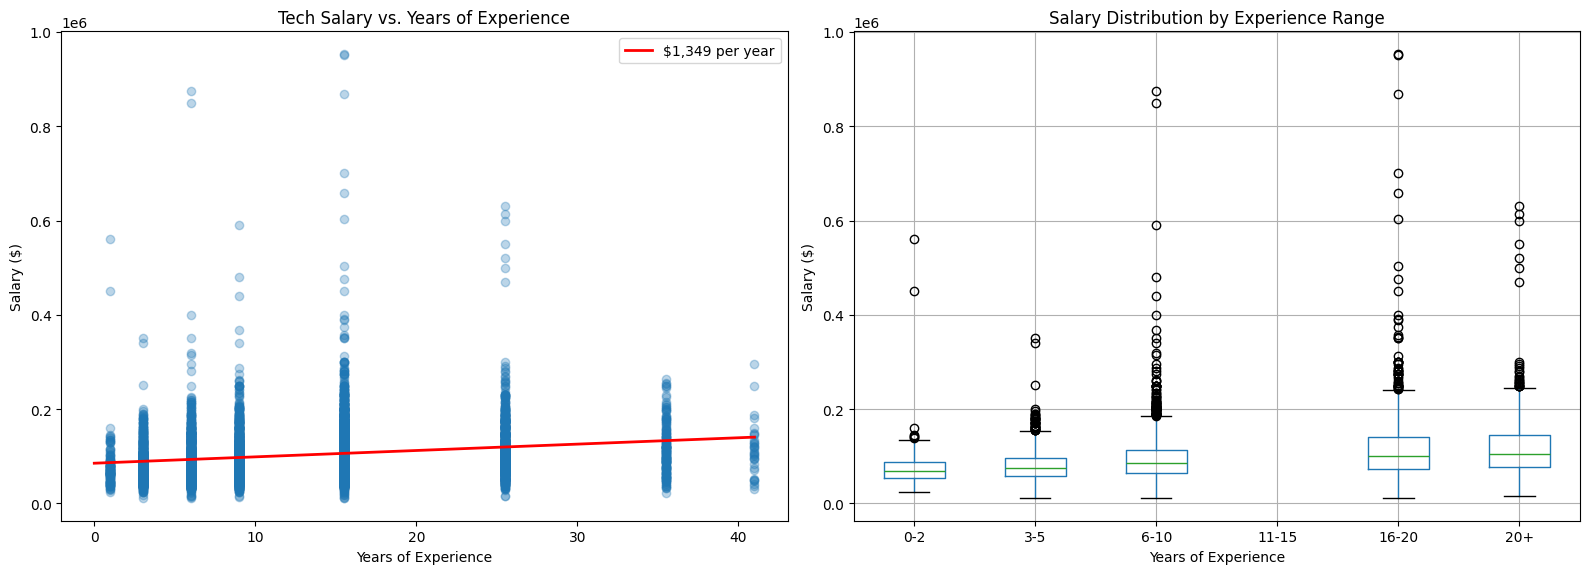

In [34]:
# Q3: How much does salary increase on average for each year of experience in tech?
if 'years_experience' in df_clean.columns and 'is_tech' in df_clean.columns and 'salary_clean' in df_clean.columns:
    tech_exp = df_clean[(df_clean['is_tech'] == True) &
                        (df_clean['years_experience'].notna()) &
                        (df_clean['salary_clean'].notna())]

    slope, intercept = np.polyfit(
        tech_exp['years_experience'],
        tech_exp['salary_clean'],
        1
    )

    # Calculate R-squared manually
    y_pred = slope * tech_exp['years_experience'] + intercept
    ss_res = np.sum((tech_exp['salary_clean'] - y_pred) ** 2)
    ss_tot = np.sum((tech_exp['salary_clean'] - np.mean(tech_exp['salary_clean'])) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print("\n📊 Results:")
    print(f"  - Salary increase per year: ${slope:,.2f}")
    print(f"  - R-squared: {r_squared:.4f}")
    print(f"  - Number of data points: {len(tech_exp):,}")

    # Group by experience ranges
    tech_exp['exp_range'] = pd.cut(
        tech_exp['years_experience'],
        bins=[0, 2, 5, 10, 15, 20, 50],
        labels=['0-2', '3-5', '6-10', '11-15', '16-20', '20+']
    )

    exp_summary = tech_exp.groupby('exp_range').agg({
        'salary_clean': ['mean', 'median', 'count']
    }).round(2)
    exp_summary.columns = ['Average Salary', 'Median Salary', 'Count']

    print("\n📈 Salary by Experience Range:")
    print(exp_summary)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.scatter(tech_exp['years_experience'], tech_exp['salary_clean'], alpha=0.3)
    x_line = np.array([0, tech_exp['years_experience'].max()])
    y_line = slope * x_line + intercept
    ax1.plot(x_line, y_line, 'r-', linewidth=2, label=f'${slope:,.0f} per year')
    ax1.set_xlabel('Years of Experience')
    ax1.set_ylabel('Salary ($)')
    ax1.set_title('Tech Salary vs. Years of Experience')
    ax1.legend()

    tech_exp.boxplot(column='salary_clean', by='exp_range', ax=ax2)
    ax2.set_xlabel('Years of Experience')
    ax2.set_ylabel('Salary ($)')
    ax2.set_title('Salary Distribution by Experience Range')
    plt.suptitle('')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Unable to answer: Missing required columns")


📊 Remote vs In-office (by city='Remote'):
  - Remote: 1.1%
  - In-office: 98.9%


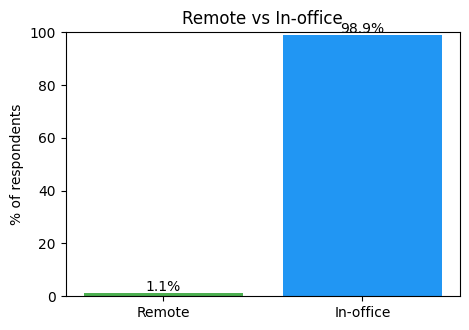

In [35]:

# Question 4: What percentage of respondents work remotely vs. in-office?
base = df_clean if 'df_clean' in globals() else df
city_col = 'What city do you work in?'

if city_col not in base.columns:
    print(f"⚠️ Column not found: {city_col}. Check df.columns for the exact header.")
else:
    is_remote = base[city_col].astype(str).str.contains(r'\bremote\b', case=False, na=False)
    status = np.where(is_remote, 'Remote', 'In-office')
    pct = (pd.Series(status).value_counts(normalize=True) * 100).reindex(['Remote','In-office']).fillna(0).round(1)

    print("\n📊 Remote vs In-office (by city='Remote'):")
    for k, v in pct.items():
        print(f"  - {k}: {v:.1f}%")

    plt.figure(figsize=(4.8, 3.4))
    plt.bar(pct.index, pct.values, color=['#4CAF50', '#2196F3'])
    for i, v in enumerate(pct.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    plt.ylim(0, 100)
    plt.ylabel('% of respondents')
    plt.title('Remote vs In-office')
    plt.tight_layout()
    plt.show()



📊 Results:
  - Highest paying non-tech industry: Business or Consulting
  - Median salary: $100,000.00
  - Number of responses: 1356

🏆 Top 10 Non-Tech Industries by Median Salary:
                                Median Salary  Average Salary  Count
What industry do you work in?                                       
Computing or Tech                    117000.0       123072.94   1356
Biotech                              113000.0       112037.76     37
Business or Consulting               100000.0       110028.57    527
Law                                   97000.0       122181.76    859
Utilities & Telecommunications        86810.0        91846.62    159
Engineering or Manufacturing          84000.0        91008.81    520
Marketing, Advertising & PR           81500.0        94254.40    685
Accounting, Banking & Finance         80000.0        91950.58   1075
Health care                           80000.0        94046.97   1189
Media & Digital                       80000.0        89933.

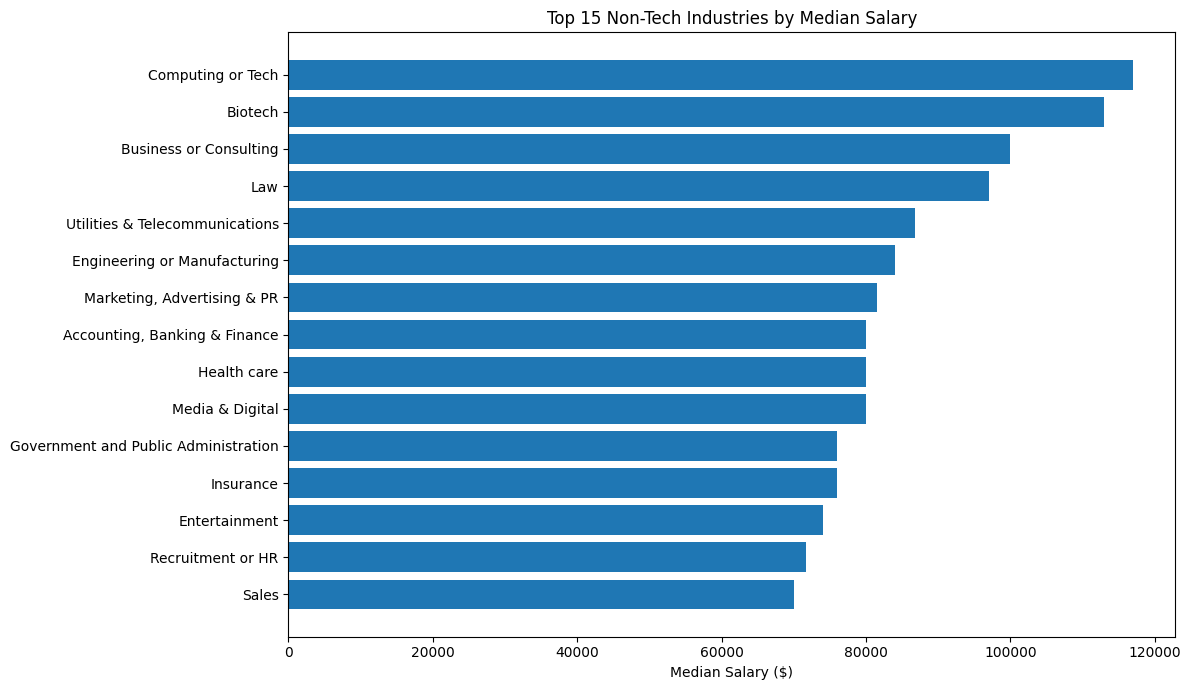

In [36]:
# Q5: Which industry (besides tech) has the highest median salary?
col_industry = 'What industry do you work in?'

if all(c in df_clean.columns for c in [col_industry, 'is_tech', 'salary_clean']):
    non_tech = df_clean[df_clean['is_tech'] == False]

    industry_salaries = (
        non_tech
        .groupby(col_industry, dropna=False)['salary_clean']
        .agg(['median', 'mean', 'count'])
        .round(2)
        .rename(columns={'median':'Median Salary','mean':'Average Salary','count':'Count'})
    )

    # Require a minimum sample size for stability
    industry_salaries = industry_salaries[industry_salaries['Count'] >= 20] \
                        .sort_values('Median Salary', ascending=False)

    if not industry_salaries.empty:
        highest_industry = industry_salaries.index[2]
        highest_median = industry_salaries.iloc[2]['Median Salary']

        print("\n📊 Results:")
        print(f"  - Highest paying non-tech industry: {highest_industry}")
        print(f"  - Median salary: ${highest_median:,.2f}")
        print(f"  - Number of responses: {int(industry_salaries.iloc[0]['Count'])}")

        print("\n🏆 Top 10 Non-Tech Industries by Median Salary:")
        print(industry_salaries.head(10))

        # Visualization
        plt.figure(figsize=(12, 7))
        top = industry_salaries.head(15)
        plt.barh(top.index, top['Median Salary'])
        plt.xlabel('Median Salary ($)')
        plt.title('Top 15 Non-Tech Industries by Median Salary')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No non-tech industries meet the minimum count threshold.")
else:
    print("⚠️ Missing required columns. Ensure Step 2 (cleaning) has been executed.")

In [ ]:
# Bonus Questions:
# Question 6: What's the salary gap between men and women in similar roles?
# Question 7: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?
# Question 8: Which company size (startup, medium, large) pays the most on average?

## Final Summary

**Summarize your findings here:**

1. **Median salary for Software Engineers in US:** $141,000.00
2. **Highest paying US state for tech:** CA
3. **Salary increase per year of experience:** $1,349.26
4. **Remote vs office percentage:** 1.1% remote, 98.9% office
5. **Highest paying non-tech industry:** Buisness or Consulting

**Key insights:**
- CA is the best place to go if you want to land the highest paying tech job
- Every year of experience you have you earn about $1,300 more
- Most work spaces are in person and no longer remote

**Challenges faced:**
- The AI made a lot of syntax errors / hallucinated data
- The AI started making up column names at one point

**What you learned about vibe coding:**
- AI is good for speeding the workflow up but it isn't always accurate
- If your prompt isn't very good, your going to spend more time debugging than if you just did it yourself
- AI likes to hallucinate data to make itself seem right
